In [1]:
#Please execute this cell
import jupman;

# Exam -  Mon 06, Sep 2021

**Scientific Programming - Data Science Master @ University of Trento**

## [Download exercises and solutions](../../../_static/generated/sciprog-ds-2021-09-06-exam.zip)

## Part A - I CHING Divination

Open Jupyter and start editing this notebook `exam-2021-09-06.ipynb`


The I Ching, or Book of Changes, is a chinese divination manual and philosophical text  which is believed to be one of the world's oldest books, dating from over 3,000 years ago. 

The great mathematician Gottfried Wilhelm Leibniz (1646 - 1716) is considered the first information theorist, and extensively documented the binary numeral system. Leibniz was also interested in Chinese culture, and [saw in the I Ching diagrams](https://en.wikipedia.org/wiki/Gottfried_Wilhelm_Leibniz#Sinophile) showing solid and broken lines called yin and yang, which progressed in a sequence: that was unmistakably a binary encoding. 

You will parse a dataset of hexagrams and develop a divinator software which will determine the outcome of your exam.

Data source: [Wikipedia, July 2021, Bagua page](https://en.wikipedia.org/wiki/Bagua)

**Yin and yang**: Yin and yang are represented by lines: 

|name|line|bit|
|----|-----|---|
|yin |`- -`| 0 |
|yang|`---`| 1 |

**Trigrams**: Different constructions of three yin and yang lines lead to 8 trigrams. We can express a trigram as a sequence of bits, reading lines from bottom to top. For example _Fire_ is `101`, _Thunder_ is `100`.

![iching-lookup-table-header.png](img/iching-lookup-table-header.png)

**Hexagrams**: Combining a lower trigram with an upper trigram leads to 64 hexagrams. Each hexagram can be represented as a sequence of bits and the outcome of a divination. For example trigrams _Fire_ (lower) and _Thunder_ (upper) gives outcome hexagram _Abounding_: `101100`

![iching-lookup-table.png](img/iching-lookup-table.png)

## A1 load_db

Parse [iching.csv](iching.csv) and output a dictionary mapping each sequence to a dictionary with all the information you can extract. Use CSV reader.

- in headers and first column you will find a bit sequence like `011`
- in body cells, you will **not** find a bit sequence: you will have to determine it according to the corresponding tri-sequences from the header and first column
- note for hexagrams you must extract **only** `name-en`, ignore the decimal numbers
- complete expected output is in file [expected_iching_db.py](expected_iching_db.py)

In [2]:
import csv

def load_db(filepath):
    
    with open(filepath, encoding='utf-8', newline='') as f:        
        my_reader = csv.reader(f, delimiter=',')
        header = next(my_reader)    
        ret = {}
        
        linear = []
        
        for s in header[1:]:
            diz = {}
            tokens = s.split('\n')
            tks = tokens[0].split('\xa0')
            diz['name-en'] = tokens[2] 
            diz['name-ch'] = tks[0]
            diz['spelling'] = tks[1]
            code = tokens[1]
            ret[code] = diz
            linear.append(code)
            
        i = 1
        for row in my_reader:                                
            for j in range(1,len(row)):                
                tokens = row[j].replace('\n','').split()
                num = int(tokens[0])
                bottom = linear[i-1]
                upper = linear[j-1]
                ret[bottom + upper] = {
                    'name-en':' '.join(tokens[1:])
                }
            i += 1            
        return ret
    

iching_db = load_db('iching.csv')   
iching_db


In [2]:
import csv

def load_db(filepath):
    raise Exception('TODO IMPLEMENT ME !')

iching_db = load_db('iching.csv')   
iching_db


EXERPT:

{'111': {'name-en': 'Heaven', 'name-ch': '乾', 'spelling': 'Qián'}
 '000': {'name-en': 'Earth', 'name-ch': '坤', 'spelling': 'Kūn'}
 '100': {'name-en': 'Thunder', 'name-ch': '震', 'spelling': 'Zhèn'}
 '010': {'name-en': 'Water', 'name-ch': '坎', 'spelling': 'Kǎn'}
 '001': {'name-en': 'Mountain', 'name-ch': '艮', 'spelling': 'Gèn'}
 '011': {'name-en': 'Air', 'name-ch': '巽', 'spelling': 'Xùn'}
 '101': {'name-en': 'Fire', 'name-ch': '離', 'spelling': 'Lí'}
 '110': {'name-en': 'Lake', 'name-ch': '兌', 'spelling': 'Duì'}
 '111111': {'name-en': 'Force'}
 '111000': {'name-en': 'Pervading'}
 '111100': {'name-en': 'Great Invigorating'}
 '111010': {'name-en': 'Attending'}
 '111001': {'name-en': 'Great Accumulating'}
 '111011': {'name-en': 'Small Harvest'}
 '111101': {'name-en': 'Great Possessing'}
     .
     .
}


In [4]:
# EXECUTE FOR TESTING
from pprint import pformat; from expected_iching_db import expected_iching_db
for seq in expected_iching_db.keys():
    if seq not in iching_db: print('\nERROR: MISSING sequence', seq); break    
    for k in expected_iching_db[seq]:
        if k not in iching_db[seq]:
            print('\nERROR at sequence', seq,'\n\n   MISSING key:', k); break    
        if expected_iching_db[seq][k] != iching_db[seq][k]:
            print('\nERROR at sequence', seq, 'key:',k)
            print('  ACTUAL:\n', pformat(iching_db[seq][k]))
            print('  EXPECTED:\n', pformat(expected_iching_db[seq][k]))
            break

## A2 divine

A divination is done by flipping 3 coins to determine the bottom trigram (**bottom up order**), flipping other three coins for the upper trigram (again **bottom up order**), and then the union gives the resulting hexagram. Write a function that PRINTS the process as in the example and RETURNS a string of bits representing the resulting hexagram

**HINT**: to flip coins use `random.randint(0,1)`


<div class="alert alert-warning">
    
**WARNING: DOUBLE CHECK THE ORDER IN WHICH LINES ARE VISUALIZED!**    
    
</div>    

In [5]:
import random

def divine(iching, question):
    
    #THE SEED DETERMINES FOLLOWING randint RESULTS
    random.seed(109)      # Abounding
                          # Thunder  
                          # Fire
        
    #IMPORTANT: try also this seed to check lines visualization order
    #random.seed(1)                                  
    #
    # Infiltrating 001011
    # Mountain ---
    #          ---
    #          - -
    # Air      ---
    #          - -
    #          - -            
    
    
    print()
    print("Dear stranger, welcome to SCIPROG I CHING 易經 DIVINATOR")
    print()
    print("Tell me your question...")
    print()    
    print('       ', question)
    print()
    
    def get_trigram(part):
        lst = []
        stack = []
        for i in range(3):
            r = random.randint(0,1)
            kind = 'yang' if r else ' yin'
            line = '---' if r else '- -'
            coin = "'heads'" if r else "'tails'"
            print('The coin says', coin, ': we get a', kind, line)
            stack.append(line)
            lst.append(str(r))
        stack.reverse()
        digits = ''.join(lst)
        print()    
        print("The sacred", part, "trigram is:",)
        print()    

        print(iching[digits]['name-en'])
        print()
        print('   ' + '\n   '.join(stack))
            
        return (stack, ''.join(lst))
    
    bottom = get_trigram('bottom')
    print()
    upper = get_trigram('upper')        
            
    print()
    print('The final response hexagram is...')
    print()
    print(iching[bottom[1] + upper[1]]['name-en'])
    print()
    print('   ' + '\n   '.join(upper[0] + bottom[0]))
        
    return bottom[1] + upper[1]
    

divination = divine(iching_db, "Will I pass the exam?")
print("\nReturned:", divination)


Dear stranger, welcome to SCIPROG I CHING 易經 DIVINATOR

Tell me your question...

        Will I pass the exam?

The coin says 'heads' : we get a yang ---
The coin says 'tails' : we get a  yin - -
The coin says 'heads' : we get a yang ---

The sacred bottom trigram is:

Fire

   ---
   - -
   ---

The coin says 'heads' : we get a yang ---
The coin says 'tails' : we get a  yin - -
The coin says 'tails' : we get a  yin - -

The sacred upper trigram is:

Thunder

   - -
   - -
   ---

The final response hexagram is...

Abounding

   - -
   - -
   ---
   ---
   - -
   ---

Returned: 101100


In [5]:
import random

def divine(iching, question):
    
    #THE SEED DETERMINES FOLLOWING randint RESULTS
    random.seed(109)      # Abounding
                          # Thunder  
                          # Fire
        
    #IMPORTANT: try also this seed to check lines visualization order
    #random.seed(1)                                  
    #
    # Infiltrating 001011
    # Mountain ---
    #          ---
    #          - -
    # Air      ---
    #          - -
    #          - -            
    
    raise Exception('TODO IMPLEMENT ME !')

divination = divine(iching_db, "Will I pass the exam?")
print("\nReturned:", divination)


Dear stranger, welcome to SCIPROG I CHING 易經 DIVINATOR

Tell me your question...

        Will I pass the exam?

The coin says 'heads' : we get a yang ---
The coin says 'tails' : we get a  yin - -
The coin says 'heads' : we get a yang ---

The sacred bottom trigram is:

Fire

   ---
   - -
   ---

The coin says 'heads' : we get a yang ---
The coin says 'tails' : we get a  yin - -
The coin says 'tails' : we get a  yin - -

The sacred upper trigram is:

Thunder

   - -
   - -
   ---

The final response hexagram is...

Abounding

   - -
   - -
   ---
   ---
   - -
   ---

Returned: 101100


## A3 plot_divination

Given a divination as a string of bits, plot the divination. 

* first draw the lines, then the rest if you have time. 
* make it fancy with these [examples](https://en.softpython.org/visualization/visualization-sol.html#Fancy-plots)
* to center text you can use these parameters: `ha='center', va='center'`

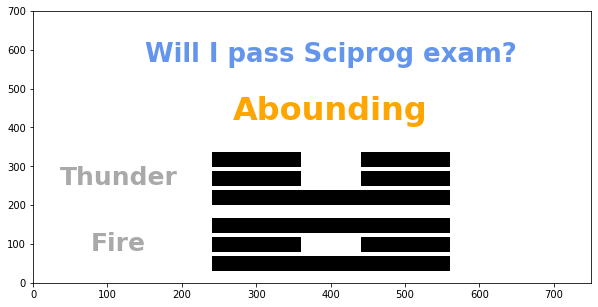

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_divination(iching, question, divination):
    
    
    fig = plt.figure(figsize=(10,5))
    
    plt.xlim(0,750)
    plt.ylim(0,700)
    
    xl = 150
    yd = 50
    segw = 100
    midx = 400

    def plot_trigram(seq, yl):
        plt.text(xl-35,
                 yl + yd*2,
                 iching[seq]['name-en'],
                 fontsize=25,
                 fontweight='bold',
                 color="darkgray",
                 ha='center',
                 va='center')

        lw = 15
        for i in range(3):
            h = yl + yd*(i+1)
            if seq[i] == '0':
                plt.plot([xl + segw,xl + segw*2], [h,h],
                         color='black',
                         linewidth=lw)                
                
                plt.plot([xl + segw*3, xl + segw*4], [h,h],
                         color='black',
                         linewidth=lw)
            else:
                plt.plot([xl + segw,xl + segw*4], [h,h],
                         color='black',
                         linewidth=lw)

    plt.text(midx,
             570,
             question,
             fontsize=26,
             fontweight='bold',
             color="CornflowerBlue", 
             ha='center')
                
    plot_trigram(divination[:3], 0)
    plot_trigram(divination[3:], 170)
        
    plt.text(midx,
             420,
             iching[divination]['name-en'],
             fontsize=32,
             fontweight='bold',
             color="orange",
             ha='center')
                
    plt.show()
    
    
plot_divination(iching_db, "Will I pass Sciprog exam?", '101100')  # Abounding
#plot_divination(iching_db, "Will I pass Sciprog exam?", '111011') # Small Harvest
#plot_divination(iching_db, "Will I pass Sciprog exam?",'001011')  # Infiltrating

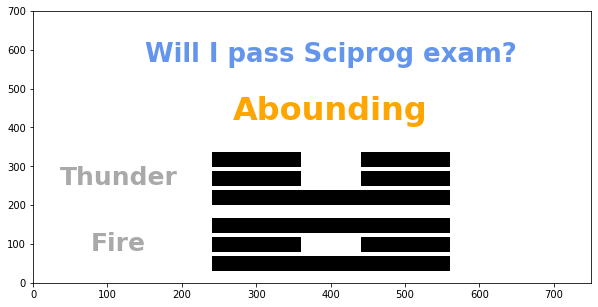

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_divination(iching, question, divination):
    raise Exception('TODO IMPLEMENT ME !')
    
plot_divination(iching_db, "Will I pass Sciprog exam?", '101100')  # Abounding
#plot_divination(iching_db, "Will I pass Sciprog exam?", '111011') # Small Harvest
#plot_divination(iching_db, "Will I pass Sciprog exam?",'001011')  # Infiltrating

## Part B

* Open Visual Studio Code and start editing the folder on your desktop

## B1 Theory

**Write the solution in separate `theory.txt` file**

### B1.1 Complexity

**1.A:** Given a list `L` of $n$ elements, please compute the asymptotic computational complexity of the `my_fun` function, explaining your reasoning.
 

```python
def my_fun(L):
    tmp = [1 for x in L]
    n = sum(tmp)

    for i in range(1, int(n/2)+1):
        if L[i-1] != L[-i]:
            return False
        else:
            return True
```

**1.B:** Do you have any idea to improve this code a little bit? 

### B1.2 nlogn

What do we mean when we say that an algorithm has asymptotic computational complexity $O(n logn)$? What do we have to do to prove that an algorithm has asymptotic computational complexity $O(nlogn)$? 

## B2 Train race

An important train race is taking place in Steam Land. Each train has a length and a velocity. A train is represented as a sequence of asterisks. A _train path_ is a list which holds all the train asterisks, and, if the train has moved _m_ positions so far, the path also holds _m_ dashes `-` before the asterisks. 

Open the file `train_race.py` and implement methods from class `TrainRace`, in particular:

def step(self):
    """ Steps the simulation by moving each train toward right 
        by a number of cells given by its velocity.            
        
                    
        *** MUST run in O(v) where v is the sum of all velocities     
        
        *** Complexity MUST *NOT* depend on train length nor dashes length
        
        *** For simplicity, ASSUME velocity is always 
            less or equal than train length                 
        
        ********      HAVE YOU READ THE REQUIREMENTS ABOVE ?   ********
    """


<div class="alert alert-warning">
    
**WARNING: AVOID EXPENSIVE LIST METHODS / OPERATORS**    
    
Passing tests is easy, the hard part is to make it _fast_: will your program run fast with a train of one million asterisks? And with a train which made a million steps?
    
</div>

**Testing**: `python3 -m unittest train_race_test.VelocityLessOrEqualThanTrainSizeTest`

**Extra** (not required during the exam): make it work also when velocity can be greater than train size, then test with: 

`python3 -m unittest train_race_test.VelocityGreaterThanTrainSizeTest`

**Example**:

In [8]:
from train_race_sol import * 

       #train  lengths     velocities
tr = TrainRace([5,3,6,3],  [2,1,3,2])

In [9]:
tr.get_paths()

[['*', '*', '*', '*', '*'],
 ['*', '*', '*'],
 ['*', '*', '*', '*', '*', '*'],
 ['*', '*', '*']]

In [10]:
tr.step()   # returns NOTHING!

In [11]:
tr.get_paths()

[['-', '-', '*', '*', '*', '*', '*'],
 ['-', '*', '*', '*'],
 ['-', '-', '-', '*', '*', '*', '*', '*', '*'],
 ['-', '-', '*', '*', '*']]

In [12]:
tr.step()

In [13]:
tr.get_paths()

[['-', '-', '-', '-', '*', '*', '*', '*', '*'],
 ['-', '-', '*', '*', '*'],
 ['-', '-', '-', '-', '-', '-', '*', '*', '*', '*', '*', '*'],
 ['-', '-', '-', '-', '*', '*', '*']]

## B3 linked algebra

Open `linked_list.py` and edit this method:

def linalg(self):
    """ Assume nodes hold data as a string "kc" where k is a single digit 
        and c any character.
        
        MODIFY the linked list by stripping the k from original nodes, 
        and inserting k-1 new nodes next to each node.
                
        - ASSUME every k is >= 1
        - MUST execute in O(s) where s is the sum of all k found.
    """


**Testing**: `python3 -m unittest linked_list_test`

**Example:**

In [15]:
from linked_list_sol import *

ll = LinkedList()

ll.add('2c')
ll.add('5b')
ll.add('3a')

print(ll)

LinkedList: 3a,5b,2c


In [16]:
ll.linalg()   # returns NOTHING!

In [17]:
print(ll)

LinkedList: a,a,a,b,b,b,b,b,c,c


with 3 nodes modified and 7 new nodes inserted